# Realtime plots of running code
March 30, 2022

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import subprocess as sp

## Run the code 
Can do this in a separate terminal as well

In [12]:
fname='run_jacobi_1d.py'
cmd='python {0}'.format(fname)

In [13]:
op=sp.check_output(cmd,shell=True)
# print(op)

## Plot the solution from saved file, as code runs.

Reads data from file. 

Data must be in the form : iter,x[0],x[1],x[2]...\n format

i.e. iteration number and solution, comma separated with new line at the end.

In [14]:
def f_plot_realtime(op_file,num=50,step=1,pause=1,last_only=False):
    '''
    num= Number of plots you want
    pause=time before it loads next dataset
    last_only= True implies it will only plot the last line of the file
    
    '''
    
    plt.rcParams["figure.figsize"]=(9,9)
    for i in range(0,num,step):
        with open(op_file,'r') as f:
            lst=f.readlines()

        if last_only: idx=-1 ## Plot just the last entry of the file
        else: idx=i
        
        k=int(lst[idx].split(',')[0])
        y=np.array(lst[idx].split(',')[1:]).astype(np.float64)
        clear_output(wait=True)  
        plt.title('Iteration={0}'.format(k))
        plt.plot(y,marker='*', linestyle='--')
        plt.pause(pause)
        plt.draw()

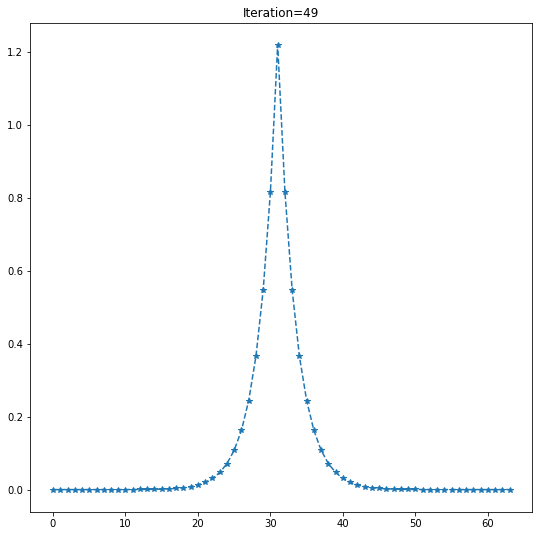

<Figure size 648x648 with 0 Axes>

In [15]:
f_plot_realtime(op_file='op2.out',num=50,step=4,pause=1,last_only=False)